<h1><center><font size="25">Introducción a grafos y redes con Python</font></center></h1>

<center><b>Fernando Carazo, Joaquín Amat</b></center>

<center><i>Enero, 2023</i></center>

## Introducción
<br>

Una de las últimas tendencias en el campo de la inteligencia artificial es el *Graph Machine Learning (GML)*. Esta disciplina se centra en aplicar algoritmos de machine learning y estadística al estudio de redes o grafos complejos.

Un grafo es una estructura de datos formada por nodos y enlaces que permite representar relaciones entre objetos. A modo de ejemplo, en una red social, los nodos podrían representar a los usuarios y los enlaces la conexión entre ellos.

El *GML* utiliza grafos para entrenar modelos de aprendizaje automático y poder hacer inferencia sobre los nodos o enlaces. Los tres tipos principales de problemas que se pueden resolver con *GML* son:

- Inferencia sobre nodos: predecir características de los nodos utilizando las características de sus nodos vecinos.

- Inferencia sobre enlaces: predecir carteristicas o exitencia de enlaces, por ejemplo, inferir qué enlaces tiene mayor probabilidad de ocurrir en un futuro. Este es un caso típico de los sistemas de recomendación.

- Inferencia sobre conjuntos de nodos: identificar comunidades de nodos que presentan comportamientos similares. Este es un caso típico en segmentación de clientes con características similares.

En esta serie de artículos se pretende mostrar las bases del *Graph Machine Learning* y resolver casos prácticos utilizando las librerías de grafos más importantes de Python como [NetworkX](https://networkx.org/) [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), [Stellargraph](https://stellargraph.readthedocs.io/en/v0.8.3/quickstart.html) o [Graph Neural Networks](https://en.wikipedia.org/wiki/Graph_neural_network).


<p align="center"><img src="../imagenes/00_Internet_map.jpg" style="width: 300px"></p>

<br>

<center><font size='2.5'>
<i>Mapa parcial de internet basado en la información obtenida del sitio opte.org el 15 de enero de 2005. Cada linea dibujada entre dos nodos representa el enlace entre dos direcciones IP. La longitud de las líneas es proporcional al tiempo de espera entre los nodos. La imagen representa 30% de las redes accesibles en el año 2005.</i>
</font></center>


## Tipos de grafos
<br>

Los grafos se clasifican en base a sus nodos y los enlaces. Se pueden diferenciar varios tipos de grafos dependiendo del tipo de relación que existe entre sus nodos.

**Grafos no dirigidos**

Los enlaces no tienen dirección, es decir, si un nodo $A$ está conectado a un nodo $B$, entonces $B$ también está conectado a $A$. Un ejemplo de grafo no dirigido es una red social donde los usuarios están conectados entre sí a través de vínculos de amistad.

<p align="center"><img src="../imagenes/10_grafo_no_dirigido_red_social.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Ejemplo de un red social, donde los nodos son usuarios y los ejes indican si existe una relación de amistad entre ellos. Es un grafo no dirigido porque las conexiones no tienen direccionalidad.</i>
</font></center>

<br>

**Grafos dirigidos**

Los enlaces tienen una dirección, es decir, si un nodo $A$ está conectado a un nodo $B$, $B$ no está necesariamente conectado a $A$. Un ejemplo de un grafo dirigido es una red de llamadas telefónicas donde los nodos son personas y los ejes muestran cada llamada, teniendo en cuenta quién llama a quién.


<p align="center"><img src="../imagenes/directed-network.png" style="width: 200px"></p>
<br>

<center><font size='2.5'>
<i> Ejemplo de grafo dirigido.</i>
</font></center>

<br>

**Grafos ponderados**

Los enlaces tienen un peso asociado, que representa la importancia o la intensidad de la relación entre los nodos. Un ejemplo de  grafo ponderado es una red de ciudades donde los enlaces representan las rutas de transporte y el peso representa la distancia entre ciudades.

<p align="center"><img src="../imagenes/08_grafo-ciudades.png" style="width: 400px"></p>

<br>

<center><font size='2.5'>
<i>Ejemplo de un red de ciudades, donde los nodos son ciudades y los ejes la distancia entre ellas. Es un grafo ponderado.</i>
</font></center>

<br>


**Grafos bipartitos**

Los nodos se dividen en dos conjuntos disjuntos (dos tipos de nodos), y solo se permiten enlaces entre nodos de diferentes conjuntos. Un ejemplo de grafo bipartito es una red de películas y actores, donde los nodos de un conjunto son las películas y los nodos del otro conjunto son los actores; y solo se permiten enlaces entre películas y actores.

<p align="center"><img src="../imagenes/imdb-bipartite.png" style="width: 400px"></p>

<br>

<center><font size='2.5'>
<i>Ejemplo de un grafo bipartito, donde los nodos pueden ser de dos tipos: actores o películas.</i>
</font></center>

## Matriz de adyacencia
<br>

Para poder analizar un grafo es neceario representarlo de forma matemática. Existen dos formas principales de hacerlo: la lista de ejes (edgelist) y la matriz de adyacencia.

La lista de ejes es simplemente una lista en la que se indican todas las conexiones. Por ejemplo, en un grafo dirigido con tres nodos {$A$, $B$ y $C$}, donde $A$ se conecta con $B$ y $C$, la lista de ejes es {($A$,$B$), ($A$,$C$)}. Si el grafo es no dirigido, la lista debe incluir las conexiones en ambas direcciones {($A$,$B$), ($B$,$A$) ($A$,$C$), ($C$,$A$)}.

Otra forma de representar un grafo es mediante lo que se conoce como matriz de adyacencia. La matriz de adyacencia es una matriz de dimensión $NxN$, siendo $N$ el número de nodos y donde aparece un 1 si la conexión entre un par de nodos existe y un 0 de lo contrario. Para grafos ponderados, en vez de un 1, la matriz presenta el valor del peso de la conexión. Debido a sus propiedades matemáticas, la matriz de adyacencia es el método de representación de grafos más utilizado. 

La desventaja de la matriz de adyacencia, es que para grafos muy grandes, puede ocupar mucho espacio. Por este motivo, se utiliza con frecuencia una *matriz de adyacencia sparse*, que internamente únicamente almacena la información de las conexiones existentes, es decir, no almacena los ceros.

Para grafos no dirigidos la matriz de adyacencia es simétrica ya que, si existe la conexión entre los nodos $A$ y $B$, también existirá la conexión recíproca.

<p align="center"><img src="../imagenes/05_adjacency_matrix.jpg" style="width: 300px"></p>

<center><font size='2.5'>
<i>Ejemplo de un grafo y su matriz de adyacencia. Al ser un grafo no dirigido, la matriz es simétrica.</i>
</font></center>

<br>

Con una formulación matetemática, la matriz de adyacencia de un grafo dirigido de $\mathrm{N}$ nodos tiene $\mathrm{N}$ filas y $\mathrm{N}$ columnas, siendo sus elementos:

- $A_{i j}=1$ si existe un enlace que apunta desde el nodo $j$ al nodo $i$

- $A_{i j}=0$ si los nodos $i$ y $j$ no están conectados entre sí

La matriz de adyacencia de una red no dirigida tiene dos entradas para cada enlace. El enlace $(1,2)$ se representa como $A_{12}$ $=1$ y $A_{21}=1$. Por lo tanto, la matriz de adyacencia de una red no dirigida es simétrica, $A_{i j}=A_{j i}.$

En la siguiente figura se representan los distintos tipos de grafos junto con sus matrices de adyacencia. Como se puede observar, los grafos dirigidos ($B$) son los únicos que no tienen una matriz de adyacencia simétrica. En el caso de los grafos bipartitos ($D$), se pueden proyectar para obtener las conexiones indirectas entre cada tipo de nodo ($E$), esto último se verá en profundidad más adelante.

<p align="center"><img src="../imagenes/01_tipos_de_grafos.jpg" style="width: 800px"></p>

<center><font size='2.5'>
<br>
    
<i>Ejemplo de grafos de distintos tipos con sus matrices de adyacencia correspondientes. A) Grafo no dirigido. B) Grafo dirigido. C) Grafo ponderado. D) Grafo bipartito, con dos tipos de nodos (verde y naranja). E) Proyección del grafo bipartito en los nodos de cada tipo. Fuente: wikipedia.</i>
</font></center>

## Meta-información de nodos y ejes.
<br>

Cuando se trabaja con grafos, especialmente si se quieren hacer predicciones u otro tipo de analítica, es muy común que se disponga de información adicional de los nodos y enlaces. Esta información se denomina meta-información porque no pertenece estrictamente al grafo y se suele almacenar a modo de tabla, cuyas filas son los nodos o enlaces y sus columnas son las variables disponibles de cada uno. Si se utiliza el ejemplo de la red social, la meta-información de los nodos podría ser el nombre, edad, aficiones, etc... 

Aunque menos común que para los nodos, los enlaces también pueden tener meta-información. Continuando con el ejmplo de la red social, la meta-información de los ejes podría ser el año en el que se inició la relación de amistad entre dos personas.

## Grafos bipartitos
<br>

Un grafo bipartito es una red cuyos nodos se pueden dividir en dos conjuntos disjuntos $U$ y $V$ de tal manera que los enlaces conectan nodos de $U$ con nodos de $V$. En otras palabras, si se colorean los nodos $U$ de verde y los nodos $V$ de morado,  unicamente existen enlaces que conecten nodos de diferentes colores.


<p align="center"><img src="../imagenes/11_grafo bipartito.jpg" style="width: 500px"></p>

<br>

<center><font size='2.5'>
<i>Ejemplo de grafo bipartito. Fuente: Network Science - Albert-László Barabási.</i>
</font></center>

<br>


Es posible generar dos proyecciones para cada red bipartita. La primera proyección conecta nodos $U$ si estos están conectados con el mismo nodo $V$ en la representación bipartita. La segunda proyección conecta nodos $V$ si estos están conectados con el mismo nodo $U$ en la representación bipartita.

Volviendo al ejemplo anterior de una red bipartita, en la que un conjunto de nodos corresponde a las películas ($U$) y el otro a los actores ($V$), y cada película está conectada a los actores que actúan en ella; la primera proyección de esta red conecta los nodos de actores sí estos han actuado en la misma película. La otra proyección, conecta las películas que comparten al menos un actor en su reparto.

## Caminos y distancias

<br>

La distancia física desempeña un papel clave en las interacciones entre los componentes de los sistemas. Por ejemplo, la distancia física entre dos ciudades influye al número de visitantes que viajan de una ciudad a otra.

En las redes, la distancia es un concepto diferente a la distancia física. Si se plantea la pregunta: ¿Cuál es la distancia entre dos usuarios de una red social? La distancia física deja de ser relevante porque dos individuos que viven en el mismo edificio pueden no conocerse y tener muy buenos amigos en otras partes del mundo.

En las redes, la distancia física se reemplaza por la longitud del camino. Un camino entre dos nodos es una ruta que se inicia en el primer nodo y recorre los enlaces de la red pasando por distintos nodos hasta llegar al segundo nodo. La longitud del camino representa el número de enlaces que contiene el camino entre dos nodos.

En la ciencia de las redes, los caminos desempeñan un papel central. A continuación, se describen algunas de sus propiedades más importantes:

**Reciprocidad**
<br>

En una red no dirigida, la distancia entre el nodo $i$ y el nodo $j$ es la misma que la distancia entre el nodo $j$ y el nodo $i$ ($d_{ij}$ = $d_{ji}$). Por lo contrario, en una red dirigida, a menudo $d_{ij}$ $\neq$ $d_{ji}$. Además, en una red dirigida, la existencia de un camino desde el nodo $i$ al nodo $j$ no garantiza la existencia de un camino desde $j$ a $i$.


**Camino más corto entre dos nodos**

En las redes determinar la distancia entre dos nodos equivale a identificar el camino más corto entre dichos nodos. La distancia (o camino más corto) $d_{ij}$ entre dos nodos $i$ y $j$ se puede calcular directamente a partir de la matriz de adyacencia $A_{i j}$. Basta con multiplicar la matriz de adyacencia por sí misma tantas veces como distancia entre dos nodos.

- $d_{i j}=1$: Si hay un enlace directo entre $i$ y $j$, entonces $A_{i j}=1$ ( $A_{i j}=0$ de lo contrario $)$

- $d_{i j}=2$: Si hay un camino de longitud 2 entre $i$ y $j$, entonces $A_{i k} A_{k j}=1\left(A_{i k} A_{k j}=0\right.$ de lo contrario). La cantidad de caminos $d_{i j}=2$ entre $i$ y $j$ es

$$
N_{i j}^{(2)}=\sum_{k=1}^N A_{i k} A_{j k}=A_{i j}^2
$$
​
 La cantidad de caminos de longitud $d$ entre $i$ y $j$ es
​
 $$
N_{i j}^{(d)}=A_{i j}^d
$$

Estas ecuaciones son válidas tanto para redes dirigidas como no dirigidas. 

En otras palabras, para obtener la distancia de orden 2 entre cualquier par de nodos, basta con multiplicar la matriz de adyacencia por sí misma. Si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`. 

Así, la matriz de distancia de orden 2 nos mostrará todos los pares de nodos que están conectados con un nodo intermedio. En el siguiente ejemplo, los nodos `2` y `5` tienen entre medias los nodos `4` y `1`, es decir, existen dos caminos posibles de orden 2 que los conectan: el `2-4-5` y el `2-1-5`. Por este motivo, si se multiplica la matriz de adyacencia por sí misma, se obtiene que el elemento [2,5] de la matriz de distancias es 2. Lo que quiere decir que existen dos caminos de distancia 2 entre los nodos 2 y 5.

<p align="center"><img src="../imagenes/05_adjacency_matrix.jpg" style="width: 300px"></p>

<center><font size='2.5'>
<i>Ejemplo de un grafo y su matriz de adyacencia. Al ser un grafo no dirigido, la matriz es simétrica.</i>
</font></center>

## Propiedades de redes y nodos

Las siguientes son algunas propiedades importantes de las redes y nodos en teoría de grafos. En artículos sucesivos se explicarán con más detalle, incluyendo su formulación e implicaciones matemáticas. 

+ **Grado de un nodo**: el número de enlaces que tiene un nodo. Los grafos dirigidos presentan dos tipos de grado "in degree" para conexiones entrantes y "out degree" para conexiones salientes.


+ **Vecindario de un nodo**: los nodos a los que está conectado directamente un nodo.


+ **Grado medio**: el promedio del grado de todos los nodos en una red.


+ **Densidad**: el número de enlaces en una red dividido por el número máximo de enlaces posibles. La densidad proporciona una idea de qúan poblada de enlaces está la red.


+ **Componentes conectadas**: grupos de nodos conectados entre sí. No tienen porqué existir todas la conexiones, pero sí que desde cualquier nodo puedas viajar al resto de nodos.


+ **Caminos y ciclos**: un camino es una secuencia de enlaces que conectan dos nodos, mientras que un ciclo es un camino que comienza y termina en el mismo nodo.


+ **Centralidad**: medida de la importancia de un nodo en una red, según su grado, vecindario, caminos y ciclos, entre otros factores.


+ **Clustering**: medida de la cantidad de enlaces existentes entre los vecinos de un nodo.


+ **Cliqué**: conjunto de nodos todos conectados con todos.


+ **Sub-grafo**: la red resultante al seleccionar únicamente una serie de nodos.

## Centralidad de los nodos
<br>

La centralidad es un concepto utilizado para medir la importancia de los nodos en un grafo. Las tres medidas de centralidad más importantes son:

+ **Centralidad de grado**: es la medida más simple, se basa en el número de enlaces que tiene un nodo, la suma de enlaces que entran y salen.


+ **Centralidad de intermediación**: mide la cantidad de caminos que pasan por un nodo.


+ **Centralidad de cercanía**: mide la distancia promedio desde un nodo a todos los demás nodos del grafo.
<br><br>

Para conocer más detalle de las propiedades de los grafos, puedes visitar el siguiente capítulo de la serie XX.

## Grafos con NetworkX
<br>

[NetworkX](https://networkx.org/) es una de las librerías de Python más utilizadas para trabajar con grafos y redes. NetworkX permite crear, manipular y analizar grafos de manera eficiente.

Una de las principales ventajas de NetworkX es su capacidad para trabajar con grafos de gran tamaño y complejidad, permitiendo manejar grafos con millones de nodos y enlaces. La librería cuenta con una gran variedad de funcionalidades que permiten crear, importar y exportar grafos en múltiples formatos, así como analizar las propiedades de estas redes (grado medio, la densidad, el coeficiente de clustering, el camino más corto entre dos nodos, y muchas otras más). Además, cuenta con una serie de algoritmos para buscar patrones, como la detección de comunidades, detección de centralidad y detección de componentes conectados. Todas estas propiedades se irán viendo en artículos sucesivos.

NetworkX también es compatible con otras librerías de Python, como NumPy, SciPy, Matplotlib o Pytorch, lo que permite integrar fácilmente el análisis de redes en un flujo de trabajo de análisis de datos más amplio.


## Funciones importantes de NetworkX
<br>

A continuación, se muestra un listado con algunas de las funciones más utilizadas de NetworkX. 

+ **Creación de grafos**: NetworkX permite crear grafos vacíos o con nodos y enlaces específicos utilizando funciones como `Graph()` (grafos no dirigidos), `DiGraph()` (grafos dirigidos), o incluso para conjuntos de grafos con `MultiGraph()` y `MultiDiGraph()`.


+ **Agregar nodos y enlaces**: Se pueden agregar nodos y enlaces a un grafo existente de forma manual, bien uno a uno con `add_node()` y `add_edge()`, o desde una lista con `add_nodes_from()`  y `add_edges_from()`. También pueden añadirse desde un archivo o DataFrame con `from_pandas_edgelist()`. Para grafos ponderados se utiliza la función `add_weighted_edges_from`.


+ **Información del grafo**: Se pueden obtener información básica del grafo, como el número de nodos y enlaces, utilizando las funciones `number_of_nodes()`, `number_of_edges()`. Utilizando `nodes()` y `edges()` se accede a la meta-información de nodos y ejes.


+ **Vecinos y grado**: Se pueden identificar los vecinos y el grado de un nodo utilizando las funciones: `neighbors()` y `degree()`; para redes dirigidas se utiliza `in_degree()` y `out_degree()`.


+ **Centralidad**: Se pueden calcular medidas de centralidad, como la centralidad de grado, la centralidad de intermediación, y la centralidad entre los nodos utilizando las funciones `degree_centrality()`, `betweenness_centrality()` y `closeness_centrality()`.


+ **Componentes conectadas**: Se pueden encontrar las componentes conectadas de un grafo utilizando la función `connected_components()`.


+ **Lectura y escritura de archivos**: NetworkX permite leer y escribir grafos en varios formatos de archivo utilizando  `read_edgelist()`, `write_edgelist()`, `read_adjlist()` y `write_adjlist()`.


+ **Algoritmos de optimización**: NetworkX tiene integrados algoritmos de optimización como el camino más corto y el flujo máximo. Se accede a ellos con las funciones `shortest_path()` y `dijkstra_path()`.


+ **Subgrafos**: Se pueden generar subgrafos de un grafo utilizando la función `subgraph()`, dando una lista de nodos como *input*.


+ **Operaciones de conjunto**: NetworkX permite realizar operaciones de conjunto en grafos tales como la unión, la intersección y la diferencia utilizando `union()`, `intersection()` y `difference()`.


+ **Matriz de adyacencia**: Con la función `nx.adjacency_matrix(G)` se obtiene la matriz de adyacencia de un grafo. Por defecto, está en formato *sparse*, para verla por pantalla hay que utilizar la función `to_dense()` de numpy.


+ **Gráfico de grafos**:La función `draw()` permite dibujar grafos utilizando la ibrería Matplotlib.


## Creación de grafos no dirigidos
<br>

NetworkX permite crear redes de manera manual, añadiendo los nodos y ejes uno por uno o desde un archivo o un DataFrame que contenga las conexiones. Esto último es especialmente útil cuando se trabaja con datos de redes que ya han sido recopilados y se encuentran en un formato estructurado.

### Creación manual

In [81]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


Para crear un grafo en NetworkX, se debe crear un objeto de tipo "Grafo" utilizando la función `nx.Graph()`. Esta función crea un grafo vacío, sin nodos ni ejes, al que se pueden agregar elementos más adelante.

In [82]:
# Creación de una instancia de tipo "Grafo"
# ======================================================================================
G = nx.Graph()
print(G)


Graph with 0 nodes and 0 edges


Se verifica que es un grafo no dirigido.

In [83]:
G.is_directed()

False

Una vez que el objeto Grafo ha sido creado, se puede poblar con nodos y conexiones. Para ello se utilizan dos métodos:

+ `add_node`: añade un único nodo al grafo.


+ `add_nodes_from`: añade multiples nodos al grafo.


+ `add_edge`: añade un eje entre los nodos *u* y *v*. Si los nodos no existen, se crean y añaden automáticamente al grafo.


+ `add_edges_from`: mismo comportamiento que `add_edge` pero utilizando una colección de ejes. Cada eje se define con una tupla (*u*, *v*).

El nombre de los nodos puede ser tanto de numérico como caracteres.

Graph with 1 nodes and 0 edges


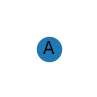

In [84]:
# Añadir un único nodo
# ======================================================================================
fig, ax = plt.subplots(figsize=(1,1))
G.add_node("A")
nx.draw(G, with_labels=True, ax=ax)
print(G)


Graph with 3 nodes and 0 edges


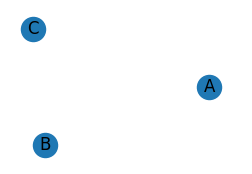

In [85]:
# Añadir multiples nodos
# ======================================================================================
G.add_nodes_from(["B", "C"])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)


Graph with 3 nodes and 1 edges


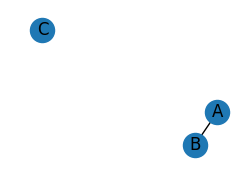

In [86]:
# Añadir un único eje
# ======================================================================================
G.add_edge("A", "B")

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)


Graph with 3 nodes and 3 edges


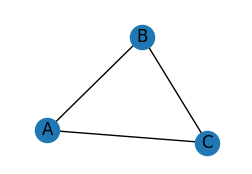

In [87]:
# Añadir múltiples ejes
# ======================================================================================
G.add_edges_from([("A", "C"), ("B", "C")])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)


Si se añade una conexión cuyos nodos no existen, se crean automáticamente.

Graph with 6 nodes and 5 edges


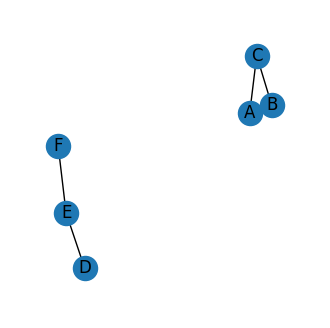

In [88]:
G.add_edges_from([("D", "E"), ("E", "F")])

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)


La matriz de adyacencia correspondiente es:

In [89]:
adjM = nx.adjacency_matrix(G)

# Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM


matrix([[0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0]])

Y el número de nodos y ejes:

In [90]:
print(G.number_of_edges())
print(G.number_of_nodes())


5
6


La información de los nodos y ejes del grafo está almacenada en los attributos `nodes` y `edges`.

In [91]:
print(f"Nodos del grafo: {G.nodes}")
print(f"Ejes del grafo: {G.edges}")


Nodos del grafo: ['A', 'B', 'C', 'D', 'E', 'F']
Ejes del grafo: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]


### Creación desde un DataFrame

Para crear un grafo a partir de un dataframe de pandas, la información tiene que estar estructurada de tal forma que una columna  represente el incio de cada eje y otra el destino. Por ejemplo, para representar que existen dos nodos ("A" y "B") conectados entre si, se necesita una fila que contenga el valor "A" en una columna y "B" en otra. Esta información es suficiente para que se creen los dos nodos y la conexión entre ambos.

In [92]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C"],
        "fin": ["C", "C", "D"],
    }
)
conexiones


,inicio,fin
0,A,C
1,B,C
2,C,D


En la función `from_pandas_edgelist` se indica la columna de origen y destino (para grafos no dirigidos, se elige un origen indistintamente).

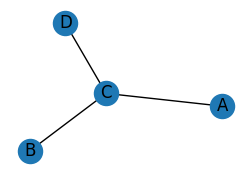

In [93]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
fig, ax = plt.subplots(figsize=(3,2))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin")
nx.draw(G, with_labels=True, ax=ax)


## Creación de grafos dirigidos

### Creación manual

Como se ha explicado anteriormente, los enlaces de los grafos dirigidos tienen una dirección definida (los enlaces de estos grafos se representan con una flecha). El proceso de creación de un grafo dirigido es esquivalente al de un grafos no dirigido pero utilizando `DiGraph` en luigar de `Graph`.

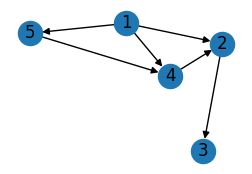

In [94]:
# Creación de un grafo dirigido".
# ======================================================================================
G = nx.DiGraph()

# Conexiones
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)


Se verifica que sí es un grafo dirigido.

In [95]:
G.is_directed()

True

### Creación desde un DataFrame

El proceso de creación de un grafo dirigido desde un DataFrame es equivalente al de los grafos no dirigidos mostrado en el apartado anterior, con la única diferencia de que se ha de indicar el argumento `create_using = nx.DiGraph`.

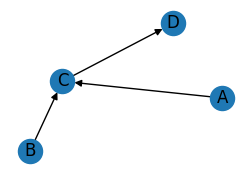

In [96]:
# Crear un grafo dirigido a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
    conexiones,
    source = "inicio",
    target = "fin",
    create_using = nx.DiGraph
)
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)


Al tratarse de un grafo dirigido, su matriz de adjacencia no es simétrica.

In [97]:
adjM = nx.adjacency_matrix(G)
adjM = adjM.todense()
adjM

matrix([[0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 0, 0]])

## Distancia entre dos nodos
<br>


Para obtener la distancia de orden 2 entre cualquier par de nodos, basta con multiplicar la matriz de adyacencia por sí misma. Si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`. 

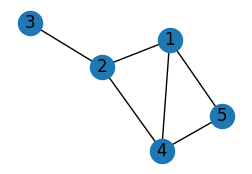

In [98]:
# Creación del grafo
G = nx.Graph()

# Se añadennodos a grafo
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)


In [99]:
# Matrix de adyacencia
adjM = nx.adjacency_matrix(G).todense()
adjM


matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 0, 0, 1, 0]])

La matriz de distancia de orden 2 muestra todos los pares de nodos que están conectados con un nodo intermedio. En el ejemplo, los nodos `2` y `5` tienen entre medias los nodos `4` y `1`, es decir, existen dos caminos posibles de orden 2 que los conectan: el `2-4-5` y el `2-1-5`. Por ese motivo, si se multiplica la matriz de adyacencia por sí misma, el elemento [2, 5] de la matriz de distancias tiene el valor 2. Lo que indica que existen dos caminos de distancia 2 entre los nodos 2 y 5.


In [100]:
# Multiplicación de la matriz por sí misma de forma matricial
distancias_orden_dos = adjM @ adjM
distancias_orden_dos

matrix([[3, 1, 1, 2, 1],
        [1, 3, 0, 1, 2],
        [1, 0, 1, 1, 0],
        [2, 1, 1, 3, 1],
        [1, 2, 0, 1, 2]])

In [101]:
# Los indices en python empiezan en 0
print(f"Caminos de orden dos entre los nodos 2 y 5 = {distancias_orden_dos[1, 4]}")

Caminos de orden dos entre los nodos 2 y 5 = 2


También se puede calcular el camino más corto (shortest path) utilizando directamente la función `nx.shortest_path`.

In [102]:
nx.shortest_path(G, source=2, target=5)


[2, 1, 5]

## Grafo ponderado
<br>

En un grafo ponderado, los ejes del grafo tienen un peso asociado. En la representación gráfica de este tipo de redes, los ejes se suelen mostrar con una anchura distinta en función de su peso.

In [103]:
# Creacion del grafo
G = nx.Graph()

# Nodos y vonexiones
G.add_weighted_edges_from(
    [(1, 2, 0.5),
    (2, 3, 0.9),
    (1, 4, 0.1),
    (1, 5, 0.75),
    (4, 2, 0.01),
    (5, 4, 0.3)]
)
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

In [104]:
# Se verifica que es un grafo no dirigido y ponderado
G.is_directed()

False

In [105]:
nx.is_weighted(G)

True

In [106]:
# Se muestra el peso de cada eje, así como los nodos que conecta
[a for a in G.edges(data=True)]

[(1, 2, {'weight': 0.5}),
 (1, 4, {'weight': 0.1}),
 (1, 5, {'weight': 0.75}),
 (2, 3, {'weight': 0.9}),
 (2, 4, {'weight': 0.01}),
 (4, 5, {'weight': 0.3})]

Para extraer los pesos, se itera sobre cada eje y se accede al tercer elemento de la tupla.

In [107]:
weights = [a[2]["weight"] for a in G.edges(data=True)]
weights

[0.5, 0.1, 0.75, 0.9, 0.01, 0.3]

Para dibujar un grafo ponderado con NetworkX, es necesario dibujar por separado nodos y ejes. En primer lugar se utiliza un utilizando un *graph layout* que define la posición de los nodos. Una vez definida su posición se representan los nodos y los ejes. Para este ejemplo se utiliza el *spring_layout*, pero hay [muchos más](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).

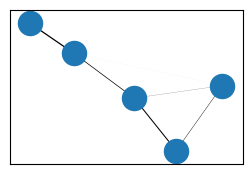

In [108]:
# Definir la posición de los nodos utilizando un layout
pos = nx.spring_layout(G)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(
    G,
    pos = pos,
    ax = ax
)
nx.draw_networkx_edges(
    G,
    pos = pos,
    edgelist = G.edges,
    width = weights,
    ax = ax
);

**Otros tipos de layout**



<p align="center"><img src="../imagenes/networkx-layout.png" style="width: 700px"></p>

<center><font size='2.5'>
<i>Ejemplos de los layouts más utilizados.</i>
</font></center>


Representar de forma separada los nodos y ejes permite tener más control sobre las caracteristicas visuales, por ejemplo, el color de los nodos y ejes. 

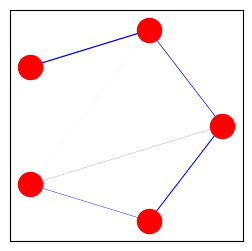

In [109]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx_nodes(G, pos=pos, node_color="red", ax=ax)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, width=weights, edge_color="blue", ax=ax);


## Grafo bipartito
<br>

Cuando los nodos de un grafo representan entidades de distinta naturaleza se utiliza el termino grafo bipartito. Un ejemplo común de este típo de grafos son las redes de publicaciones donde existen nodos de tipo "artículo" y otros de tipo "escritor". 

En este tipo de grafos, las conexiones únicamente puden ocurrir entre nodos de distinta naturaleza, cada escritor está conectado a los artículos que ha escrito. No pueden existir conexiones directas entre artículos o entre escritores.

Para crear un grafo bipartito NetworkX se utiliza el método `add_nodes_from()` con el que se agregan los nodos indicando el tipo con el argumento `bipartite` y luego se utiliza el método `add_edges_from()` para agregar las relaciones entre ellos. A continuación, se muesra un ejemplo de cómo crear un grafo bipartito con dos conjuntos de nodos llamados "grupo A" y "grupo B".

In [110]:
# Crear un grafo bipartito vacío
G_peliculas_actores = nx.Graph()

# Agregar los nodos de cada grupo
G_peliculas_actores.add_nodes_from(["Pelicula_1", "Pelicula_2", "Pelicula_3"], bipartite="Peliculas")
G_peliculas_actores.add_nodes_from(["Actor_1", "Actor_2", "Actor_3"], bipartite="Actores")

# Agregar las relaciones entre los nodos
G_peliculas_actores.add_edges_from(
    [
        ("Pelicula_1", "Actor_1"),
        ("Pelicula_2", "Actor_2"),
        ("Pelicula_3", "Actor_3"),
        ("Pelicula_2", "Actor_3"),
        ("Pelicula_2", "Actor_1"),
    ]
)

In [111]:
G_peliculas_actores.nodes(data=True)

NodeDataView({'Pelicula_1': {'bipartite': 'Peliculas'}, 'Pelicula_2': {'bipartite': 'Peliculas'}, 'Pelicula_3': {'bipartite': 'Peliculas'}, 'Actor_1': {'bipartite': 'Actores'}, 'Actor_2': {'bipartite': 'Actores'}, 'Actor_3': {'bipartite': 'Actores'}})

Para acceder al tipo de cada nodo se recorre cada nodo y se accede al attributo `"bipartite"`.

In [112]:
tipo_nodo = [
    G_peliculas_actores.nodes[i]["bipartite"]
    for i in G_peliculas_actores.nodes()
]
tipo_nodo


['Peliculas', 'Peliculas', 'Peliculas', 'Actores', 'Actores', 'Actores']

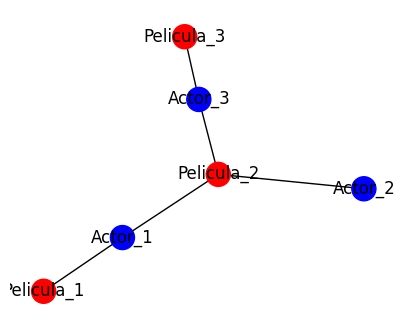

In [113]:
# colores para cada tipo de nodo en el grafo bipartito
colores = {"Peliculas": "red", "Actores": "blue"}
colores_nodos = [colores[n] for n in tipo_nodo]

fig, ax = plt.subplots(figsize=(5, 4))
nx.draw(
    G_peliculas_actores,
    pos=nx.spring_layout(G_peliculas_actores),
    with_labels=True,
    node_color=colores_nodos,
    ax=ax,
)


En el código anterior se utiliza la función *spring_layout* para posicionar los nodos en el gráfico. Con el arguemento `with_labels=True` se muestran las etiquetas de los nodos y con `node_color`se asigna el color de cada nodo.

Una vez que creado el grafo bipartito, se puede hacer una proyección de éste para obtener un grafo no bipartito que contenga sólo los nodos de uno de los conjuntos. Para hacer esto, se emplea el método `project()` especificando el conjunto de nodos que se desea incluir en la proyección. A continuación se genera una proyección del grafo bipartito para obtener sólo los nodos del grupo 'Actores'.

In [114]:
# Se identifican los nodos del conjunto de interés
nodes_bipartite = [
    n[0]
    for n in G_peliculas_actores.nodes(data=True)
    if n[1]["bipartite"] == "Actores"
]

# Proyección del grafo bipartito para obtener sólo los nodos del grupo A
G_actores = nx.bipartite.projected_graph(B, nodes_bipartite)

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G_actores, with_labels=True, ax=ax)
ax.set_xlim([1.2 * x for x in ax.get_xlim()])
ax.set_ylim([1.2 * y for y in ax.get_ylim()])


NameError: name 'B' is not defined

## Meta-información: atributos de nodos y ejes
<br>

En la matoria de los problemas de grafos reales, se dispone de información adicional de nodos y ejes.  Los atributos de los nodos se añaden con el método `networkx.set_node_atributes(Grafo, diccionario, nombre)` y los atributos de los ejes se añaden con el método `networkx.set_edge_atributes()`.

In [ ]:
# Creación del grafo
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])
G.edges(data=True)

In [ ]:
# Añadir atributos de los nodos
node_name = {1: "Jaime", 2: "María", 3: "Julio", 4: "Rosa", 5: "Alberto"}

node_aficiones = {
    1: ["Futbol"],
    2: ["Baile", "Pádel"],
    3: ["Golf", "Baile"],
    4: ["Cocina"],
    5: ["Cocina", "Jamón"],
}

nx.set_node_attributes(G, node_name, name="Nombre")
nx.set_node_attributes(G, node_aficiones, name="Aficiones")

# añadir atributos de los ejes
edges_weight = {
    (1, 2): 0.5,
    (2, 3): 0.9,
    (1, 4): 0.1,
    (1, 5): 0.75,
    (4, 2): 0.01,
    (5, 4): 0.3,
}

nx.set_edge_attributes(G, edges_weight, name="weight")

Para acceder a los atributos de nodos y ejes (meta-información) se utiliza `G.nodes(data=True)` o `G.edges(data=True)`. 
Estos comandos devuelven una estructura en forma de diccionario donde la clave es el nombre del nodo y el valor contiene todos los atributos.

In [ ]:
G.nodes(data=True)

In [ ]:
G.edges(data=True)

Los atributos de ejes y nodos se pueden iterar directamente como si se tratase de un diccionario.

In [ ]:
for m, n, w in G.edges(data=True):
    print(
        f"Eje que conecte el nodo {m} con el nodo {n} y tiene un peso de {w['weight']}."
    )


## Caso de estudio: círculos sociales de Facebook (Stanford)
<br>

La base de datos "Social circles: Facebook" fue creada por investigadores de la universidad de Stanford en el año 2012. Este conjunto de datos consta de redes de amistad de Facebook. Los datos disponibles incluyen características de nodos (perfiles) y sus conexiones de amistad. Los datos fueron anonimizados reemplazando los nombres y otras identificaciones por un índice numérico. Pueden descargarse de la web de Stanford (https://snap.stanford.edu/data/ego-Facebook.html).

### Libreías

In [ ]:
# Librerías
# ==============================================================================
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import networkx as nx
warnings.filterwarnings("ignore")

### Lectura de los datos

In [ ]:
# Lectura de datos
# ==============================================================================
facebook = pd.read_csv(
    "../data/facebook_combined.txt",
    header=None,
    sep=" ",
    names=["user_1", "user_2"],
)

Los datos consisten en una lista de ejes entre usuarios, cada fila es una relacción de amistad. Para reducir los requerimientos computacionales, en este ejemplo se emplean únicamente las 2000 primeras conexiones.

In [ ]:
facebook = facebook[:2000]
facebook.head()

Al ser relaciones de amistad y no tener direccionalidad, se representan mediante un grafo no direccional.

In [ ]:
# Creación de grafo
# ==============================================================================
G_facebook = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2", create_using=nx.Graph())

### Información del grafo


Se muestra la información sobre la estructura del grafo.

In [ ]:
print("Número de nodos:", G_facebook.number_of_nodes())
print("Número de enlaces:", G_facebook.number_of_edges())

### Visualización de la red

Al visualizar la red se observa que hay tres comunidades de usuarios: 

- Dos grandes conjuntos de usuarios altamente conectados.

- Un grupo de unos pocos nodos centrales, algunos de los cuales conectan los otros dos grandes grupos.

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(G_facebook)
nx.draw_networkx(
    G_facebook, pos=spring_pos, with_labels=False, node_size=15, ax=ax
)


### Vecinos y grado

Para cualquier nodo del grafo, se puede conocer quienes son sus vecinos y su grado (el número de vecinos que tiene el nodo). 

In [ ]:
nodo_id = 4
vecinos = list(G_facebook.neighbors(nodo_id))
print("Vecinos del nodo {nodo_id}:", vecinos)

grado = G_facebook.degree[nodo_id]
print("Grado del nodo {nodo_id}:", grado)

Utilizando la función `subgraph`, se pueden extraer el nodo y sus vecinos, y analizaros con mayor detalle.

In [ ]:
nodos = vecinos + [nodo_id]
G_s = nx.subgraph(G_facebook, nodos)

fig, ax = plt.subplots(figsize=(7, 4))
nx.draw_networkx(G_s, pos=spring_pos, with_labels=True, node_size=200, node_color='r', ax=ax)

### Centralidad
<br>

Como se ha descrito anteriormente, la centralidad es un concepto utilizado para medir la importancia de los nodos en un grafo.

In [ ]:
# Métricas de centralidad para un único nodo
# ==============================================================================
nodo_id = 4

# 1. **Centralidad de grado**
# Se basa en el número de enlaces que tiene un nodo. Es el número de enlaces que entran y salen de un nodo.
centralidad_grado = nx.degree_centrality(G_facebook)
print("Centralidad de grado:", centralidad_grado[nodo_id])

# 2. **Centralidad de intermediación**
# Mide la cantidad de caminos que pasan por un nodo.
centralidad_intermediacion = nx.betweenness_centrality(G_facebook)
print("Centralidad de intermediación:", centralidad_intermediacion[nodo_id])

# 3. **Centralidad de cercanía**
# Mide la distancia promedio desde un nodo a todos los demás nodos del grafo.
centralidad_cercania = nx.closeness_centrality(G_facebook)
print("Centralidad de cercanía:", centralidad_cercania[nodo_id])


In [ ]:
# Métricas de centralidad para todos los nodos
# ==============================================================================
grado = pd.DataFrame.from_dict(centralidad_grado, orient='index',columns=["grado"])
intermendiacion = pd.DataFrame.from_dict(centralidad_intermediacion, orient='index',columns=["intermediacion"])
cercania = pd.DataFrame.from_dict(centralidad_cercania, orient='index',columns=["cercania"])
centralidad = pd.concat([grado, intermendiacion, cercania], axis=1)
centralidad

Se puede observar que, por norma general, los nodos con alta centralidad de grado, también tienen alta centralidad de intermediación. Sin embargo, se pueden encontar algunos nodos que tienen alta intermeciación pero bajo grado. 

En este grafo, se pueden observar cuatro nodos con alta intermediación y bajo grado. Estos cuatro nodos son los cuatro nodos que estaban entre los dos grandes grupos de usuarios.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
centralidad.plot.scatter(x="grado", y="intermediacion", ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

## Visualización avanzada de redes
<br>

Existen otras librerías con las que se pueden visualizar redes mucho más grandes de forma muy eficiente e interactiva. En próximos artículos se mostrarán con detalle las principales alternativas.



<p align="center"><img src="../imagenes/Facebook-nf.png" style="width: 700px"></p>

<center><font size='2.5'>
<i>Representación generada con Netwulf.</i>
</font></center>


## Información de sesión

In [ ]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.6.3
networkx            3.0
netwulf             0.1.5
pandas              1.5.3
session_info        1.0.0
-----
IPython             8.9.0
jupyter_client      8.0.2
jupyter_core        5.2.0
notebook            6.2.0
-----
Python 3.9.16 (main, Jan 11 2023, 16:05:54) [GCC 11.2.0]
Linux-5.15.0-1028-aws-x86_64-with-glibc2.31
-----
Session information updated at 2023-02-11 16:42


## Bibliografía
<br>

Network Science - Albert-László Barabási

https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

http://networksciencebook.com/


**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Introducción a grafos y redes con Python por Fernando Carazo y Joaquín Amat, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python.html

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo and Joaquín Amat is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [ ]:
%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px;
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>